In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Parameters for distribution A
mean_A = [-0.5, -0.5]
cov_A = [[1, 0.25], [0.25, 1]]

# Parameters for distribution B
mean_B = [0.5, 0.5]
cov_B = [[1, 0.25], [0.25, 1]]

# Generate samples
m = 1000
samples_A = np.random.multivariate_normal(mean_A, cov_A, m)
samples_B = np.random.multivariate_normal(mean_B, cov_B, m)


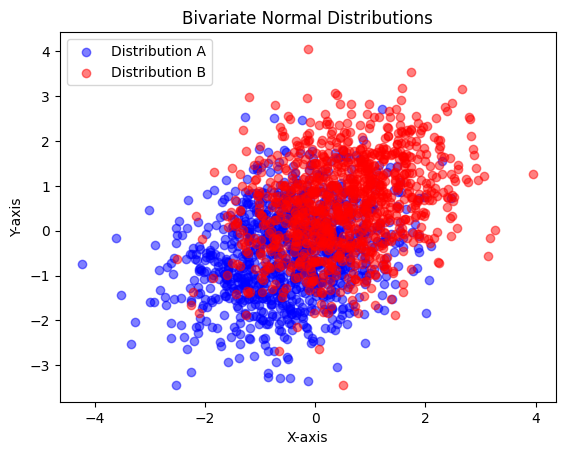

In [3]:
# Stack the samples into a single dataset
X = np.vstack((samples_A, samples_B))

# Plot the samples
plt.scatter(samples_A[:, 0], samples_A[:, 1], color='blue', label='Distribution A', alpha=0.5)
plt.scatter(samples_B[:, 0], samples_B[:, 1], color='red', label='Distribution B', alpha=0.5)
plt.title('Bivariate Normal Distributions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


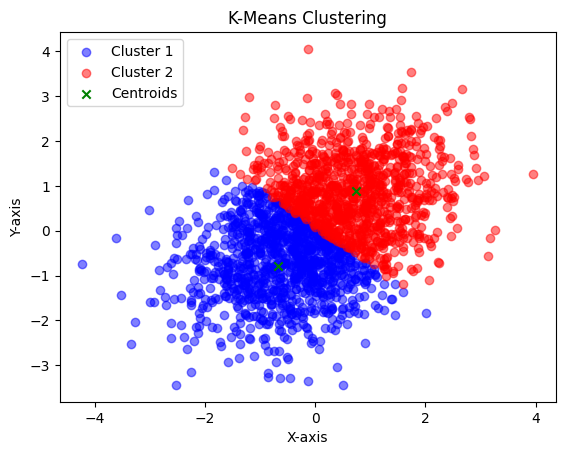

In [4]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Plot the clusters
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color='blue', label='Cluster 1', alpha=0.5)
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color='red', label='Cluster 2', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='green', marker='x', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# Generate synthetic data
X = np.random.normal(0, 1, (100, 4))
X[:, 2] = 3 * X[:, 0] - 2 * X[:, 1] + np.random.normal(0, 0.1, 100)
X[:, 3] = 1.5 * X[:, 0] - 0.5 * X[:, 1] + np.random.normal(0, 0.1, 100)

# Convert the data to a PyTorch tensor
X = torch.tensor(X, dtype=torch.float32)


In [7]:
# Subtract mean for zero-centering
X = X - X.mean(dim=0)


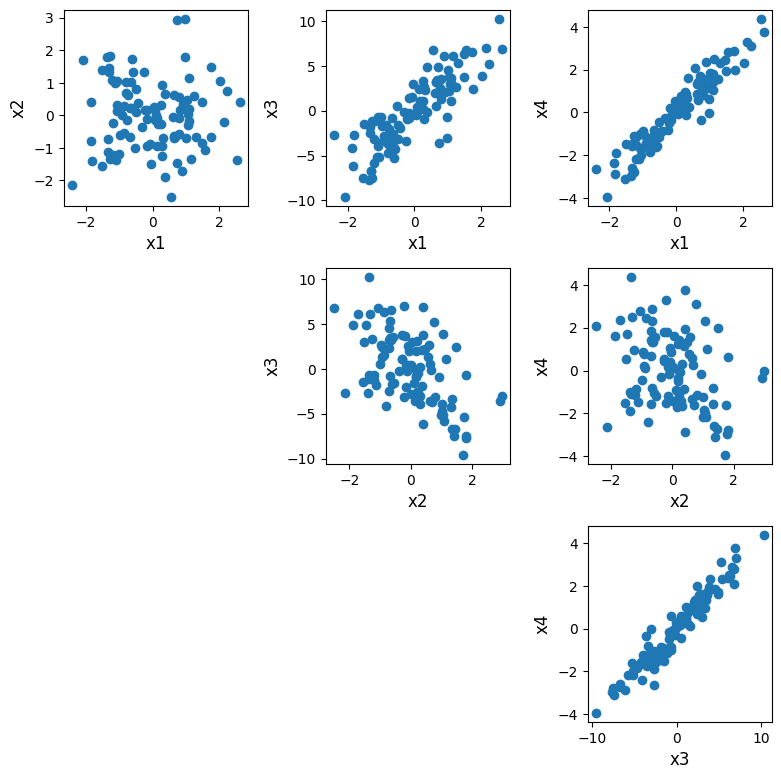

In [8]:
plt.figure(figsize=(10, 10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4, 4, i * 4 + j + 1)
            plt.scatter(X[:, i].numpy(), X[:, j].numpy())
            plt.xlabel(f'x{i+1}', fontsize=12)
            plt.ylabel(f'x{j+1}', fontsize=12)
plt.tight_layout()
plt.show()


In [10]:
# Calculate covariance matrix
cov_matrix = torch.mm(X.T, X) / (X.size(0) - 1)

# Compute eigenvalues and eigenvectors using torch.linalg.eig
eigenvalues, eigenvectors = torch.linalg.eig(cov_matrix)

# Since torch.linalg.eig returns complex tensors, convert them to real values if applicable
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

# Sort eigenvalues and corresponding eigenvectors in descending order
eigenvalues, indices = torch.sort(eigenvalues, descending=True)
eigenvectors = eigenvectors[:, indices]

# Project the data onto the principal components
X_pca = torch.mm(X, eigenvectors)


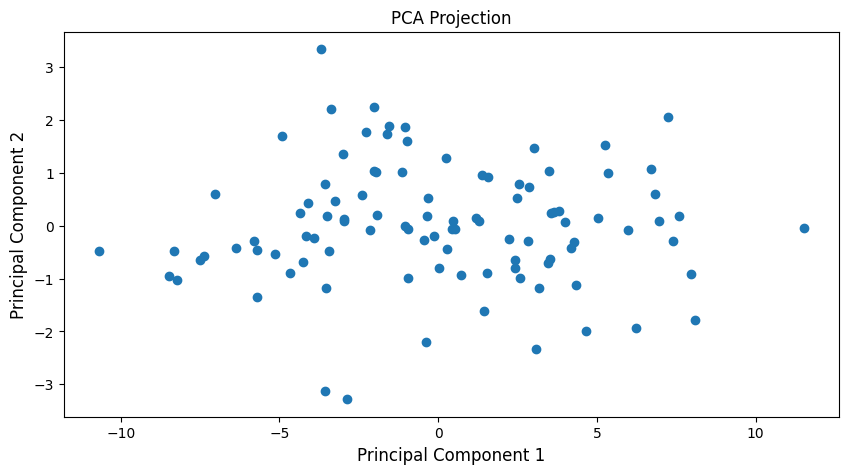

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0].numpy(), X_pca[:, 1].numpy())
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('PCA Projection')
plt.show()
